In [1]:
from keras.models import load_model
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
os.environ['SM_FRAMEWORK'] = "tf.keras"
import segmentation_models as sm

2023-12-01 19:08:25.054032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:08:26.627565: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-01 19:08:26.627668: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-12-01 19:08:26.627679: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Segmentation Models: using `tf.keras` framework.


In [2]:
model = load_model("models/solidwaste_95.hdf5", compile=False)

2023-12-01 19:08:29.378048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-01 19:08:29.478144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/anaconda3/envs/fuseenv/lib/python3.7/site-packages/cv2/../../lib64:
2023-12-01 19:08:29.478186: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-01 19:08:29.478649: I tensorflo

In [3]:
image_path = 'Data/train_images/train/img_25.tif'
img = cv2.imread(image_path,1)

In [4]:
# from rasterio.plot import reshape_as_raster, reshape_as_image
# import rasterio
# img = rasterio.open('../../Data/train_images/train/img_348.tif').read()
# img = reshape_as_image(img)
# plt.imshow(img)

In [5]:
img.shape

(256, 256, 3)

In [6]:
# from PIL import Image

# img = Image.open('Data/train_images/train/img_17.tiff').convert('RGB')
# plt.imshow(img)
# plt.axis('off')
# plt.show()


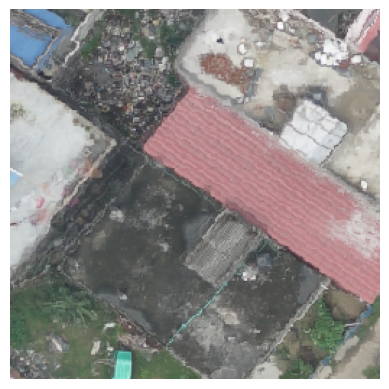

In [7]:
# image_path = 'images/data.png'
# image_path = '../../../Pictures/Screenshots/Screenshot from 2023-11-28 13-52-34.png'
# image_path = 'Screenshot from 2023-11-27 23-10-26.png'
image_path = 'Data/train_images/train/img_25.tif'
img = cv2.imread(image_path,1)
# img = cv2.resize(img, (256, 256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [9]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [10]:
# img = (img - img.min()) / (img.max() - img.min())
img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
img = preprocess_input(img)  #Preprocess based on the pretrained backbone...

In [11]:
in_img = img.reshape((1, 256, 256, 3))


In [12]:
in_img.shape

(1, 256, 256, 3)

In [13]:
img.shape

(256, 256, 3)

In [14]:
pred = model.predict(in_img)
pred_margmax = np.argmax(pred,axis=3)

1/1 [==============================] - 1s 1s/step


In [15]:
pred_margmax[0].shape

(256, 256)

In [16]:
in_img[0].shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


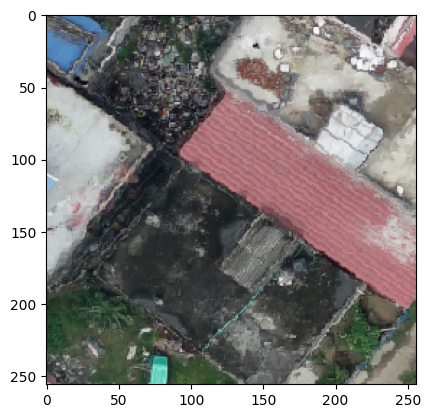

In [18]:
plt.imshow(img)

In [19]:
# from PIL import Image
# img1 = Image.fromarray(img)
# plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


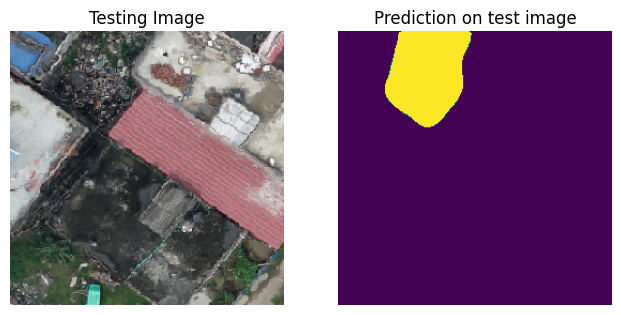

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(pred_margmax[0])
plt.axis('off')
plt.show()

In [21]:
from PIL import Image


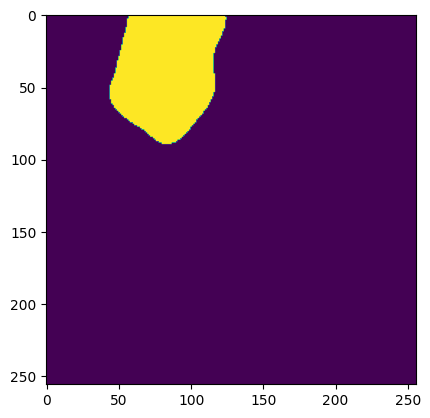

In [22]:
plt.imshow(pred_margmax[0])